# EJERCICIOS

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization,Dropout
from keras.initializers import HeNormal,lecun_normal
from keras.activations import swish, selu

In [3]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1738679095.649594    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738679095.774671    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738679095.774928    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [5]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


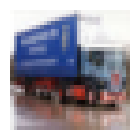

In [6]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)

In [8]:



model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))
    




I0000 00:00:1738679133.626933    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738679133.627251    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738679133.627441    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738679133.712109    6148 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [9]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc=[]

mejor_acc_val=0
mejor_modelo=None
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo = model
    i+=1

Epoch 1/30


I0000 00:00:1738679151.250218    6419 service.cc:146] XLA service 0x7c7264014780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738679151.250261    6419 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-04 15:25:51.529411: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-04 15:25:51.949809: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100


  58/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 55.2034 - sparse_categorical_accuracy: 0.0949

I0000 00:00:1738679153.477054    6419 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 7.3652 - sparse_categorical_accuracy: 0.1546 - val_loss: 2.1041 - val_sparse_categorical_accuracy: 0.2274
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0473 - sparse_categorical_accuracy: 0.2481 - val_loss: 1.9551 - val_sparse_categorical_accuracy: 0.2784
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9234 - sparse_categorical_accuracy: 0.3021 - val_loss: 1.8653 - val_sparse_categorical_accuracy: 0.3244
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8493 - sparse_categorical_accuracy: 0.3289 - val_loss: 1.7864 - val_sparse_categorical_accuracy: 0.3554
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7926 - sparse_categorical_accuracy: 0.3518 - val_loss: 1.7892 - val_sparse_categorical_accuracy: 0.3550
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7388 - sparse_categorical_accuracy: 0.3707 - val_loss: 1.7427 - val_sparse_categorical_accuracy: 0.3688
Ep

In [10]:
mejor_lr=mejor_modelo.optimizer.learning_rate.numpy()
print(mejor_lr)
print(mejor_acc_val)

0.007
0.454800009727478


In [11]:
train_loss, train_SC_accuracy = mejor_modelo.evaluate(x_train, y_train)
print("Pérdida:", train_loss, "Precisión:", train_SC_accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - loss: 2.3033 - sparse_categorical_accuracy: 0.1001
Pérdida: 2.3032872676849365 Precisión: 0.10013999789953232


In [12]:
val_loss, val_SC_accuracy = mejor_modelo.evaluate(x_val, y_val)
print("Pérdida:", val_loss, "Precisión:", val_SC_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 2.3047 - sparse_categorical_accuracy: 0.0983
Pérdida: 2.3041629791259766 Precisión: 0.09640000015497208


In [13]:
test_loss, test_SC_accuracy = mejor_modelo.evaluate(x_test, y_test)
print("Pérdida:", test_loss, "Precisión:", test_SC_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 2.3025 - sparse_categorical_accuracy: 0.1072
Pérdida: 2.302835702896118 Precisión: 0.10220000147819519


In [14]:
dicc.append({
    'Red neuronal normal': {

        'Tasa de aprendizaje': mejor_modelo.optimizer.learning_rate.numpy(),

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy,

        'Validación sparse categorical accuracy': test_SC_accuracy,

        'Tiempo total (s)': mejor_tiempo

    }
})
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 155.58655977249146}}


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [15]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=float(mejor_modelo.optimizer.learning_rate.numpy()))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_opti = Sequential()
model_opti.add(Input(shape=(32, 32,3)))
model_opti.add(Flatten())
for _ in range(20):
    model_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_opti.add(Dense(10, activation="softmax"))



model_opti.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history=model_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

train_acc= history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]

   
end_time = time.time()

training_time = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 25.1396 - sparse_categorical_accuracy: 0.1357 - val_loss: 2.3081 - val_sparse_categorical_accuracy: 0.0966
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3148 - sparse_categorical_accuracy: 0.1010 - val_loss: 2.3054 - val_sparse_categorical_accuracy: 0.0964
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3090 - sparse_categorical_accuracy: 0.1007 - val_loss: 2.3064 - val_sparse_categorical_accuracy: 0.0964
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3093 - sparse_categorical_accuracy: 0.0997 - val_loss: 2.3062 - val_sparse_categorical_accuracy: 0.0964
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3093 - sparse_categorical_accuracy: 0.1004 - val_loss: 2.3079 - val_sparse_categorical_accuracy: 0.0964
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3098 - sparse_categorical_accuracy: 0.0974 - val_loss: 2.3074 - val_sparse_categorical_ac

In [16]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1
#best_epoch_acc= max(history.history['sparse_categorical_accuracy'])
#best_epoch_index = history.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': mejor_modelo.optimizer.learning_rate.numpy(),

        'Entrenamiento sparse categorical accuracy': history.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time,

        'Mejor época': best_epoch

    }
})



In [17]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 155.58655977249146}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 46.98207998275757, 'Mejor época': 7}}


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [18]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_lotes = Sequential()
modelo_lotes.add(Input(shape=(32, 32,3)))
modelo_lotes.add(Flatten())

for _ in range(20):
    modelo_lotes.add(BatchNormalization())
    modelo_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
modelo_lotes.add(Dense(10, activation="softmax"))

In [19]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories=[]
models_lotes=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    modelo_lotes.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=modelo_lotes.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_lotes.append(model)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 2.6081 - sparse_categorical_accuracy: 0.1041 - val_loss: 2.5651 - val_sparse_categorical_accuracy: 0.1258
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.3109 - sparse_categorical_accuracy: 0.1389 - val_loss: 2.2173 - val_sparse_categorical_accuracy: 0.1970
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.1325 - sparse_categorical_accuracy: 0.2039 - val_loss: 2.0452 - val_sparse_categorical_accuracy: 0.2404
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.0075 - sparse_categorical_accuracy: 0.2530 - val_loss: 1.8967 - val_sparse_categorical_accuracy: 0.3070
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9102 - sparse_categorical_accuracy: 0.3028 - val_loss: 1.8106 - val_sparse_categorical_accuracy: 0.3420
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8309 - sparse_categorical_accuracy: 0.3403 - val_loss: 1.7283 - val_sparse_categorical_accuracy

In [20]:
best_model_lotes = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_lotes)

{'ID': 4, 'LR': 0.003, 'sparse categorical accuracy training': 0.7200599908828735, 'sparse categorical accuracy validation': 0.47600001096725464, 'Tiempo Total(s)': 135.6924066543579}


In [21]:
dicc.append({
    'Red neuronal por lotes': {

        'Tasa de aprendizaje': best_model_lotes['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_lotes['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_lotes['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_lotes['Tiempo Total(s)']

    }
})

In [22]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 155.58655977249146}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 46.98207998275757, 'Mejor época': 7}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7200599908828735, 'Validación sparse categorical accuracy': 0.47600001096725464, 'Tiempo total (s)': 135.6924066543579}}


In [23]:
optimizer_lotes = tf.keras.optimizers.Nadam(learning_rate=best_model_lotes['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_lotes_opti = Sequential()
model_lotes_opti.add(Input(shape=(32, 32,3)))
model_lotes_opti.add(Flatten())
for _ in range(20):
    model_lotes_opti.add(BatchNormalization())
    model_lotes_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_lotes_opti.add(Dense(10, activation="softmax"))



model_lotes_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_lotes,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_lotes=model_lotes_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_lotes = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - loss: 2.1768 - sparse_categorical_accuracy: 0.2114 - val_loss: 1.8553 - val_sparse_categorical_accuracy: 0.3320
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.8499 - sparse_categorical_accuracy: 0.3355 - val_loss: 1.7612 - val_sparse_categorical_accuracy: 0.3828
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7733 - sparse_categorical_accuracy: 0.3699 - val_loss: 1.6785 - val_sparse_categorical_accuracy: 0.4048
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.7230 - sparse_categorical_accuracy: 0.3935 - val_loss: 1.6997 - val_sparse_categorical_accuracy: 0.4136
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6725 - sparse_categorical_accuracy: 0.4139 - val_loss: 1.6500 - val_sparse_categorical_accuracy: 0.4366
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6218 - sparse_categorical_accuracy: 0.4318 - val_loss: 1.7497 - val_sparse_categorical_ac

In [24]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

dicc.append({
    'Red neuronal por lotes con detención temprana': {

        'Tasa de aprendizaje': best_model_lotes['LR'],

        'Entrenamiento sparse categorical accuracy': history_lotes.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_lotes.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_lotes,

        'Mejor época': best_epoch

    }
})

In [25]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.10220000147819519, 'Tiempo total (s)': 155.58655977249146}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.09932000190019608, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 46.98207998275757, 'Mejor época': 7}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.7200599908828735, 'Validación sparse categorical accuracy': 0.47600001096725464, 'Tiempo total (s)': 135.6924066543579}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.003, 'Entrenamiento sparse categorical accuracy': 0.6304200291633606, 'Validación sparse categorical accuracy': 0.4869999885559082, 'Tiempo total (s)': 109.66546368598938, 'Mejor época': 12}}


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [26]:
x_train_norm = (x_train - np.average(x_train)) / (np.std(x_train))
x_val_norm = (x_val - np.average(x_val)) / (np.std(x_val))
x_test_norm = (x_test - np.average(x_test)) / (np.std(x_test))

y_train_norm = (y_train - np.average(y_train)) / (np.std(y_train))
y_val_norm = (y_val - np.average(y_val)) / (np.std(y_val))
y_test_norm = (y_test - np.average(y_test)) / (np.std(y_test))

In [27]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_selu = Sequential()
model_selu.add(Input(shape=(32, 32,3)))
model_selu.add(Flatten())
for _ in range(20):
    model_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu.add(Dense(10, activation="softmax"))
    

In [28]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories_selu=[]
models_selu=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_selu.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

Epoch 1/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.0459 - sparse_categorical_accuracy: 0.2461 - val_loss: 1.7932 - val_sparse_categorical_accuracy: 0.3458
Epoch 2/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7770 - sparse_categorical_accuracy: 0.3559 - val_loss: 1.7760 - val_sparse_categorical_accuracy: 0.3510
Epoch 3/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6916 - sparse_categorical_accuracy: 0.3873 - val_loss: 1.6882 - val_sparse_categorical_accuracy: 0.3984
Epoch 4/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.6341 - sparse_categorical_accuracy: 0.4100 - val_loss: 1.6114 - val_sparse_categorical_accuracy: 0.4316
Epoch 5/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5966 - sparse_categorical_accuracy: 0.4247 - val_loss: 1.6164 - val_sparse_categorical_accuracy: 0.4280
Epoch 6/45
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5633 - sparse_categorical_accuracy: 0.4390 - val_loss: 1.5910 - val_sparse_categorical_accuracy:

In [29]:
best_model_selu = max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_selu)

{'ID': 1, 'LR': 0.0003, 'sparse categorical accuracy training': 0.6152200102806091, 'sparse categorical accuracy validation': 0.4702000021934509, 'Tiempo Total(s)': 111.06037473678589}


In [65]:
dicc.append({
    'Red neuronal selu': {

        'Tasa de aprendizaje': best_model_selu['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_selu['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_selu['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_selu['Tiempo Total(s)']

    }
})

In [ ]:
for entry in dicc:
    print(entry)

In [ ]:
optimizer_selu = tf.keras.optimizers.Nadam(learning_rate=best_model_selu['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_selu_opti = Sequential()
model_selu_opti.add(Input(shape=(32, 32,3)))
model_selu_opti.add(Flatten())
for _ in range(20):
    model_selu_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu_opti.add(Dense(10, activation="softmax"))

model_selu_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_selu,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_selu=model_selu_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_selu = end_time - start_time

In [68]:
best_epoch_acc= max(history_selu.history['sparse_categorical_accuracy'])
best_epoch_index = history_selu.history['sparse_categorical_accuracy'].index(best_epoch_acc)


dicc.append({
    'Red neuronal selu con detención temprana': {

        'Tasa de aprendizaje': best_model_selu['LR'],

        'Entrenamiento sparse categorical accuracy': history_selu.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_selu.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_selu,

        'Mejor época': best_epoch_index

    }
})

In [ ]:
for entry in dicc:
    print(entry)

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [70]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_dropout = Sequential()
model_dropout.add(Input(shape=(32, 32,3)))
model_dropout.add(Flatten())
for _ in range(20):
    model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))
    

In [ ]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
entries=[]
histories_dropout=[]
models_dropout=[]

    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[i])
    

    i+=1
    model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model_dropout.fit(x_train, y_train, epochs=45, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time

    entries.append({'ID':idx,
                 'LR':lr,
                 'sparse categorical accuracy training':history.history['sparse_categorical_accuracy'][-1],
                 'sparse categorical accuracy validation':history.history['val_sparse_categorical_accuracy'][-1],
                 'Tiempo Total(s)':training_time
                   })
    models_selu.append(model)

In [ ]:
best_model_dropout= max(entries, key=lambda x: x['sparse categorical accuracy validation'])
print(best_model_dropout)

In [74]:
dicc.append({
    'Red neuronal dropout': {

        'Tasa de aprendizaje': best_model_dropout['LR'],

        'Entrenamiento sparse categorical accuracy': best_model_dropout['sparse categorical accuracy training'],

        'Validación sparse categorical accuracy': best_model_dropout['sparse categorical accuracy validation'],

        'Tiempo total (s)': best_model_dropout['Tiempo Total(s)']

    }
})

In [ ]:
for entry in dicc:
    print(entry)

In [ ]:
optimizer_dropout = tf.keras.optimizers.Nadam(learning_rate=best_model_dropout['LR'])
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_dropout_opti = Sequential()
model_dropout_opti.add(Input(shape=(32, 32,3)))
model_dropout_opti.add(Flatten())
for _ in range(20):
    model_dropout_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout_opti.add(Dense(10, activation="softmax"))

model_dropout_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_dropout,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_dropout=model_dropout_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_dropout = end_time - start_time

In [78]:
best_epoch_acc= max(history_dropout.history['sparse_categorical_accuracy'])
best_epoch_index_dropout = history_dropout.history['sparse_categorical_accuracy'].index(best_epoch_acc)

dicc.append({
    'Red neuronal dropout con detención temprana': {

        'Tasa de aprendizaje': best_model_dropout['LR'],

        'Entrenamiento sparse categorical accuracy': history_dropout.history['sparse_categorical_accuracy'][-1],

        'Validación sparse categorical accuracy': history_dropout.history['val_sparse_categorical_accuracy'][-1],

        'Tiempo total (s)': training_time_dropout,

        'Mejor época': best_epoch_index

    }
})

In [ ]:
for entry in dicc:
    print(entry)